<a href="https://colab.research.google.com/github/mayangg08/CS105-Exer4/blob/main/Copy_of_Copy_of_Activity_5_NACUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#https://drive.google.com/file/d/19xS9e1D6rc1f-in4jahiRmPu0tj_TKWr/view
file_id = '19xS9e1D6rc1f-in4jahiRmPu0tj_TKWr'
link = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(link)
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0.0,0.0,1.0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0.0,0.0,1.0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0.0,0.0,0.0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0.0,0.0,0.0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0.0,0.0,0.0,0,0,1


In [ ]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              2
Personal Loan         1
Securities Account    1
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
data = data.drop(["ID","ZIP Code"], axis = 1)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0.0,0.0,1.0,0,0,0
1,45,19,34,3,1.5,1,0.0,0.0,1.0,0,0,0
2,39,15,11,1,1.0,1,0.0,0.0,0.0,0,0,0
3,35,9,100,1,2.7,2,0.0,0.0,0.0,0,0,0
4,35,8,45,4,1.0,2,0.0,0.0,0.0,0,0,1


<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

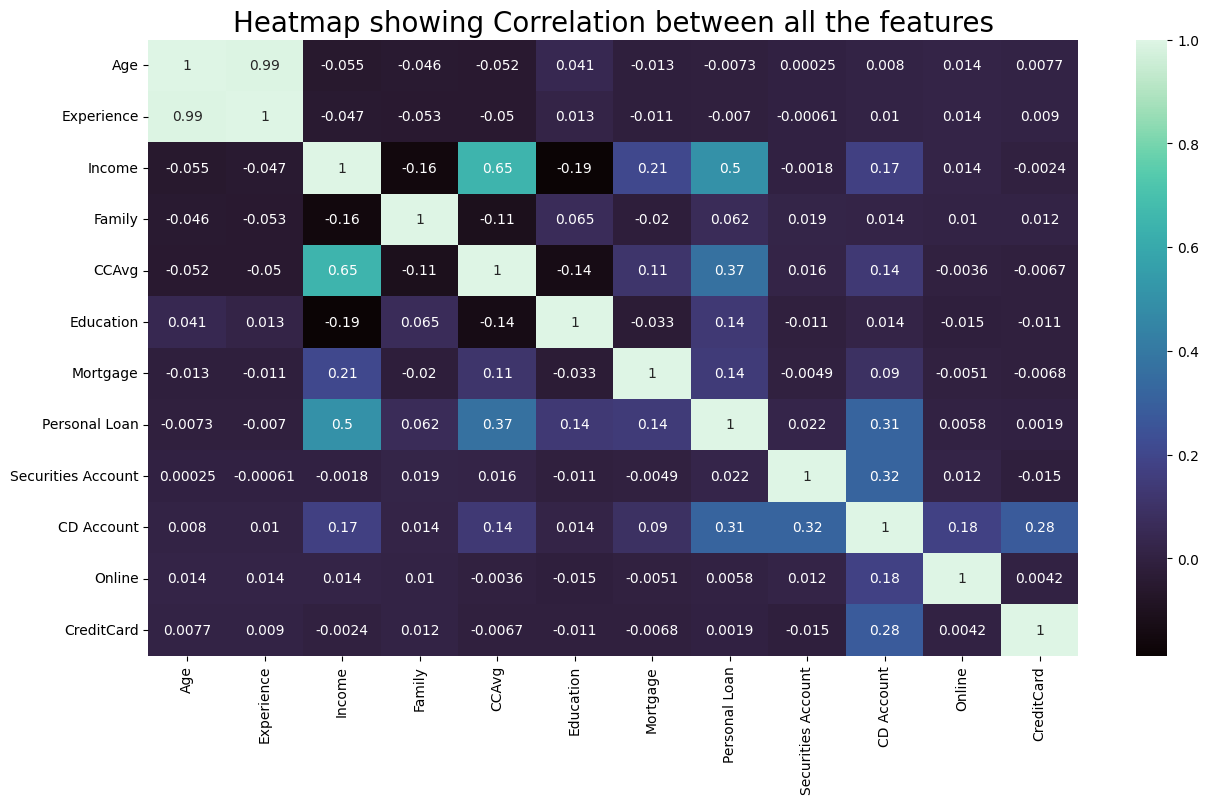

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(data.corr(),annot = True, cmap='mako')

In [ ]:
noCC = data[data.CreditCard==0]
noCC.shape

(3530, 12)

In [ ]:
yesCC = data[data.CreditCard==1]
yesCC.shape

(1470, 12)

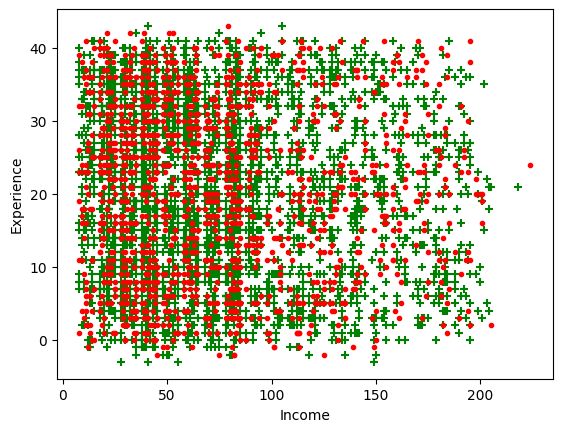

In [ ]:
plt.xlabel('Income')
plt.ylabel('Experience')
plt.scatter(noCC['Income'],noCC['Experience'], color = 'green', marker='+')
plt.scatter(yesCC['Income'], yesCC['Experience'], color = 'red', marker='.')

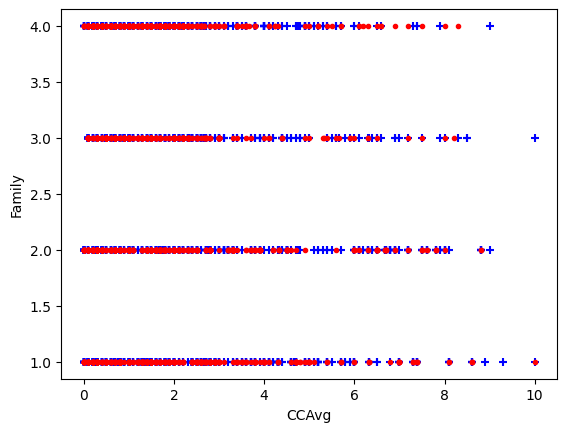

In [ ]:
plt.xlabel('CCAvg')
plt.ylabel('Family')
plt.scatter(noCC['CCAvg'],noCC['Family'], color = 'blue', marker='+')
plt.scatter(yesCC['CCAvg'], yesCC['Family'], color = 'red', marker='.')

In [ ]:
data = data.drop(["CCAvg","Education", "Mortgage", "Personal Loan", "Securities Account"], axis = 1)
data.head()

,Age,Experience,Income,Family,CD Account,Online,CreditCard
0,25,1,49,4,0,0,0
1,45,19,34,3,0,0,0
2,39,15,11,1,0,0,0
3,35,9,100,1,0,0,0
4,35,8,45,4,0,0,1


In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
print(x)
print(y)

[[25  1 49  4  0  0]
 [45 19 34  3  0  0]
 [39 15 11  1  0  0]
 ...
 [63 39 24  2  0  0]
 [65 40 49  3  0  1]
 [28  4 83  3  0  1]]
[0 0 0 ... 0 0 1]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
print(x)
print(y)

[[-1.77441684 -1.66607847 -0.53822878  1.39741398 -0.25354028 -1.21661774]
 [-0.02952359 -0.09633022 -0.8641094   0.52599094 -0.25354028 -1.21661774]
 [-0.55299157 -0.44516316 -1.36379301 -1.21685513 -0.25354028 -1.21661774]
 ...
 [ 1.54088033  1.64783451 -1.08136314 -0.34543209 -0.25354028 -1.21661774]
 [ 1.71536965  1.73504275 -0.53822878  0.52599094 -0.25354028  0.82195086]
 [-1.51268285 -1.40445376  0.20043396  0.52599094 -0.25354028  0.82195086]]
[0 0 0 ... 0 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=19)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC(kernel='linear').fit(x_train,y_train)
predictions = linear_classifier.predict(x_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with linear kernel : 0.761


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  0.23933333333333334
mean_absolute_error :  0.23933333333333334


In [ ]:
print("Actual\t:\tPredictions")
for i in range(len(predictions)):
  print(f"{y_train[i]}\t:\t{predictions[i]}")

Actual	:	Predictions
0	:	0
1	:	0
0	:	0
0	:	0
1	:	1
0	:	0
0	:	0
1	:	0
0	:	0
0	:	0
0	:	0
1	:	0
1	:	0
1	:	0
0	:	0
1	:	0
0	:	1
0	:	0
1	:	0
0	:	0
1	:	0
0	:	0
0	:	0
1	:	0
1	:	0
1	:	0
1	:	0
1	:	0
0	:	0
0	:	0
0	:	0
1	:	0
1	:	0
0	:	0
1	:	0
0	:	0
1	:	0
0	:	0
0	:	0
1	:	0
0	:	0
1	:	0
1	:	0
0	:	0
0	:	0
1	:	0
1	:	1
0	:	0
0	:	0
0	:	0
1	:	0
0	:	1
1	:	0
0	:	0
1	:	0
0	:	1
0	:	0
1	:	0
1	:	0
0	:	0
1	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
1	:	0
1	:	0
1	:	0
0	:	0
0	:	0
1	:	0
1	:	0
0	:	0
0	:	1
0	:	0
1	:	0
0	:	1
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
1	:	0
0	:	0
0	:	0
0	:	0
0	:	1
1	:	0
1	:	0
1	:	0
0	:	1
0	:	0
0	:	1
0	:	1
0	:	0
1	:	0
1	:	0
0	:	0
1	:	0
0	:	0
1	:	0
1	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
1	:	0
1	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
1	:	0
0	:	1
0	:	0
0	:	0
0	:	0
1	:	0
0	:	0
0	:	0
0	:	0
1	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
1	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
1	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
1	:	0
0	:	0
1	:	0
1	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
1	:	0
0

In [ ]:
import pickle
pickle.dump(svc, open('model.pkl','wb'))